# Importing Libraries

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Loading and Previewing Dataset

In [3]:
# Fetch dataset from UCI repository
student_performance = fetch_ucirepo(id=320)

# Separate features and target
X = student_performance.data.features
y = student_performance.data.targets

# Print metadata and variable details 
print(student_performance.metadata)
print(student_performance.variables)

# Preview data
print(X.head())
print(y.head())
print(X.shape, y.shape)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

# Data Exploration

              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

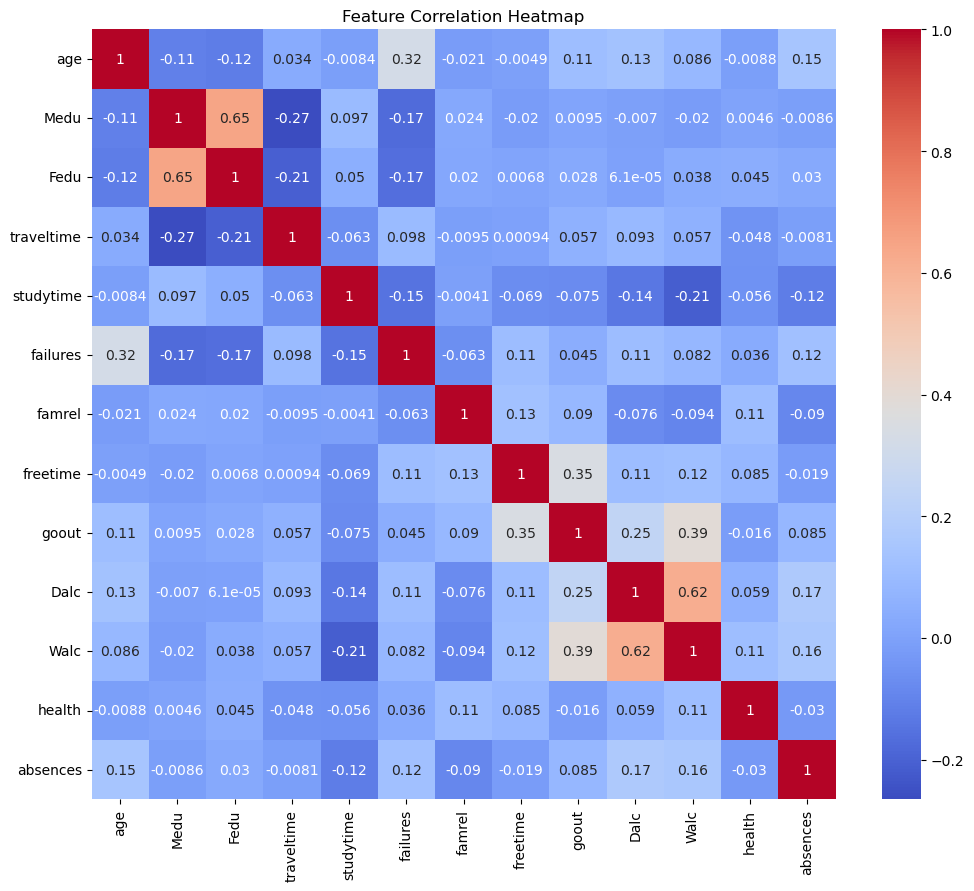

In [4]:
# Summary statistics and data types
print(X.describe())
print(X.info())

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Visualize Target Distribution

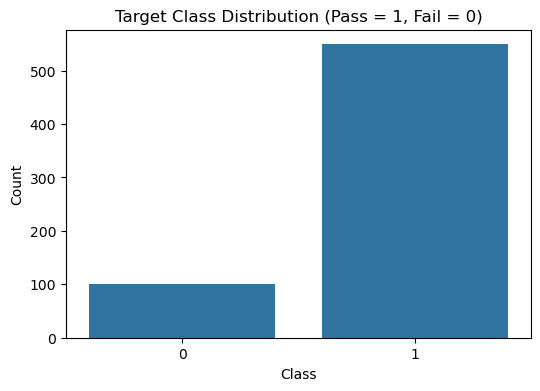

In [5]:
# Convert final grade G3 into binary class: Pass (>=10) vs Fail (<10)
y_binary = (y['G3'] >= 10).astype(int)

# Distribution plot
plt.figure(figsize=(6, 4))
sns.countplot(x=y_binary)
plt.title("Target Class Distribution (Pass = 1, Fail = 0)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Data Preprocessing

In [6]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binary, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Training ML Models

In [7]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)


# Model Evaluation

In [8]:
# Define evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate both models
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")


--- Logistic Regression ---
Accuracy: 0.8769230769230769
Confusion Matrix:
 [[  6   9]
 [  7 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.40      0.43        15
           1       0.92      0.94      0.93       115

    accuracy                           0.88       130
   macro avg       0.69      0.67      0.68       130
weighted avg       0.87      0.88      0.87       130

--- K-Nearest Neighbors ---
Accuracy: 0.8692307692307693
Confusion Matrix:
 [[  0  15]
 [  2 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.88      0.98      0.93       115

    accuracy                           0.87       130
   macro avg       0.44      0.49      0.47       130
weighted avg       0.78      0.87      0.82       130



# Visualize Confusion Matrices

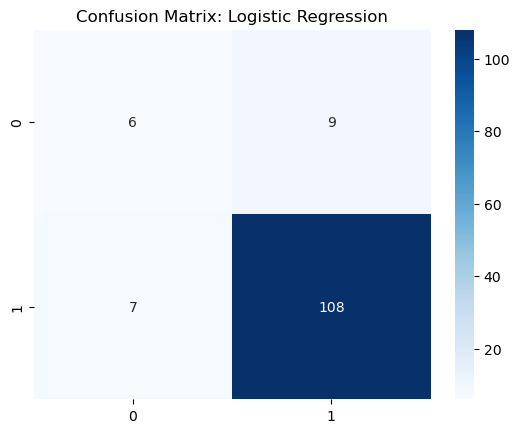

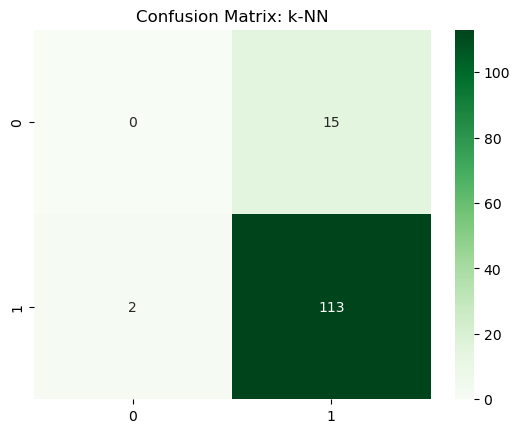

In [9]:
# Confusion Matrix: Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# Confusion Matrix: k-NN
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: k-NN")
plt.show()


# Feature Importance (Logistic Regression)

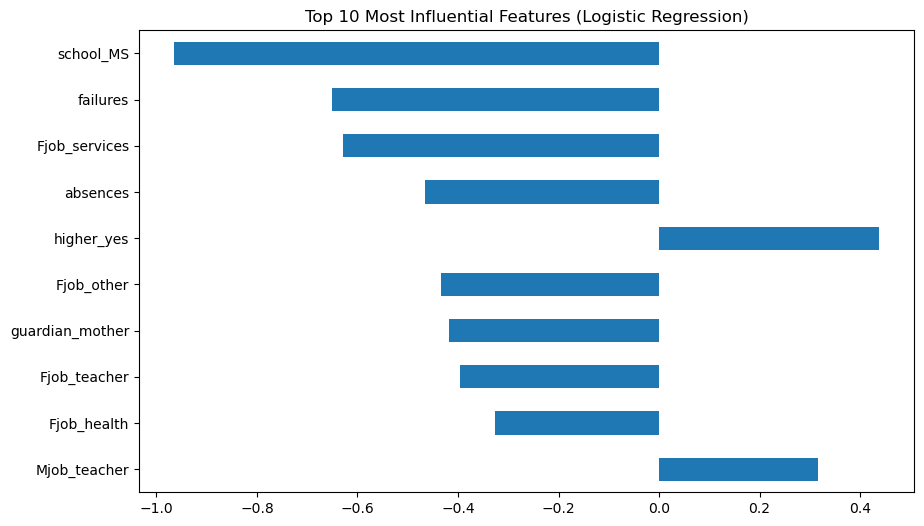

In [10]:
coefficients = pd.Series(logreg.coef_[0], index=X_encoded.columns).sort_values(key=abs, ascending=False)
plt.figure(figsize=(10, 6))
coefficients[:10].plot(kind='barh')
plt.title("Top 10 Most Influential Features (Logistic Regression)")
plt.gca().invert_yaxis()
plt.show()

# Compare Model Accuracy

/var/folders/jx/snnmkv1n5w3g0s3l5tfmrzf00000gq/T/ipykernel_32510/2990995799.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='pastel', legend=False)


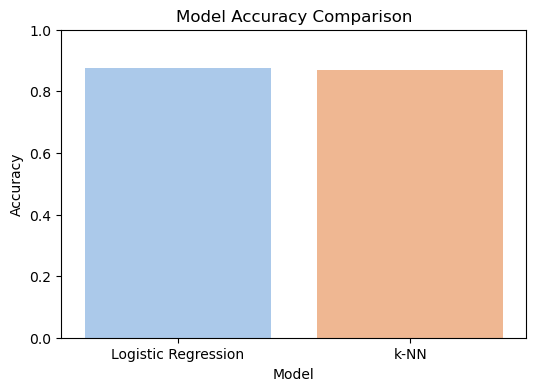

In [16]:
# Calculate accuracies
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_knn = accuracy_score(y_test, y_pred_knn)

# Create a DataFrame for plotting
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'k-NN'],
    'Accuracy': [acc_logreg, acc_knn]
})

# Plot without warning
plt.figure(figsize=(6, 4))
sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='pastel', legend=False)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()